# 01_image_conversion.ipynb
## (Refactorizado) Paso 1: Convertir Excel a Imágenes

**Objetivo:** Convertir únicamente los archivos Excel a imágenes PNG. Los archivos PDF se procesarán directamente con la API ADE en el siguiente paso.

In [1]:
import sys
import logging
from pathlib import Path

# --- Celda de Configuración Estándar ---
# 1. Añadir el directorio PADRE (la raíz del proyecto) al path
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# 2. Importar la config (esto carga el .env automáticamente)
import src.utils.config 
from src.utils.config import INPUT_EXCEL_DIR, EXCEL_IMAGES_DIR

# 3. Configurar logging básico para el notebook
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

print(f"Raíz del proyecto establecida en: {PROJECT_ROOT}")
print("✅ Entorno configurado. Logging listo.")

Raíz del proyecto establecida en: c:\Users\Usuario\Documents\UTEC\Liquidaciones Agent\multidoc-agent
✅ Entorno configurado. Logging listo.


## 1. Listar y Procesar Archivos Excel

In [2]:
# Importar la función de preprocesamiento de Excel
from src.preprocessors import process_all_excels

excel_files = list(INPUT_EXCEL_DIR.glob("*.xlsx"))
print(f"Archivos Excel encontrados: {len(excel_files)}")
for f in excel_files:
    print(f"  - {f.name}")

Archivos Excel encontrados: 2
  - 10841- INFORME GENERAL - MN - SKY KNIGHT  -  LAS BAMBAS   - 09 -10 -2025 (1).xlsx
  - ~$10841- INFORME GENERAL - MN - SKY KNIGHT  -  LAS BAMBAS   - 09 -10 -2025 (1).xlsx


In [3]:
# Ejecutar el pipeline de conversión de Excel
print("Iniciando conversión de Excel -> PNG...")
excel_results = process_all_excels()
print("Conversión completada.")

for result in excel_results:
    if result['status'] == 'success':
        print(f"  ✅ Éxito: {result['metadata']['original_file']}")
        print(f"     -> Imagen: {result['metadata']['image_path']}")
    else:
        print(f"  ❌ Error: {result.get('metadata', {}).get('original_file', 'Desconocido')}: {result['message']}")

INFO:src.preprocessors.excel_to_image:Encontrados 2 archivos Excel
INFO:src.preprocessors.excel_to_image:Iniciando conversión de Excel (en chunks): c:\Users\Usuario\Documents\UTEC\Liquidaciones Agent\multidoc-agent\data\input\excel\10841- INFORME GENERAL - MN - SKY KNIGHT  -  LAS BAMBAS   - 09 -10 -2025 (1).xlsx


Iniciando conversión de Excel -> PNG...


INFO:src.preprocessors.excel_to_image:Usando rango total: B1:JC223
INFO:src.preprocessors.excel_to_image:Excel procesado y guardado como 8 chunks PNG.
INFO:src.preprocessors.excel_to_image:Metadata de Excel guardada: 10841- INFORME GENERAL - MN - SKY KNIGHT  -  LAS BAMBAS   - 09 -10 -2025 (1)_metadata.json
INFO:src.preprocessors.excel_to_image:Iniciando conversión de Excel (en chunks): c:\Users\Usuario\Documents\UTEC\Liquidaciones Agent\multidoc-agent\data\input\excel\~$10841- INFORME GENERAL - MN - SKY KNIGHT  -  LAS BAMBAS   - 09 -10 -2025 (1).xlsx
ERROR:src.preprocessors.excel_to_image:Error al convertir Excel a imagen: [Errno 13] Permission denied: 'c:\\Users\\Usuario\\Documents\\UTEC\\Liquidaciones Agent\\multidoc-agent\\data\\input\\excel\\~$10841- INFORME GENERAL - MN - SKY KNIGHT  -  LAS BAMBAS   - 09 -10 -2025 (1).xlsx'
Traceback (most recent call last):
  File "c:\Users\Usuario\Documents\UTEC\Liquidaciones Agent\multidoc-agent\src\preprocessors\excel_to_image.py", line 35, in

Conversión completada.
  ✅ Éxito: 10841- INFORME GENERAL - MN - SKY KNIGHT  -  LAS BAMBAS   - 09 -10 -2025 (1).xlsx


KeyError: 'image_path'

## 2. Validación y Visualización

Imágenes de Excel generadas: 8
Mostrando las primeras 3 imágenes:


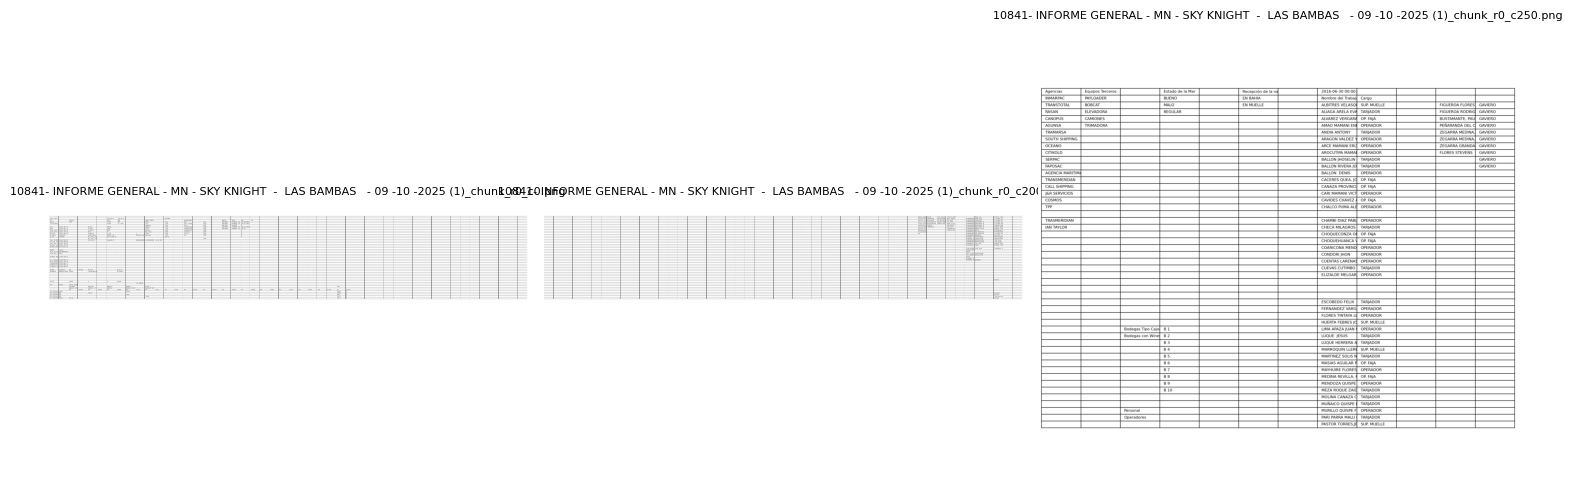

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

excel_images = list(EXCEL_IMAGES_DIR.glob("*.png"))
print(f"Imágenes de Excel generadas: {len(excel_images)}")

if excel_images:
    print("Mostrando las primeras 3 imágenes:")
    fig, axes = plt.subplots(1, min(3, len(excel_images)), figsize=(15, 5))
    
    if len(excel_images) == 1:
        axes = [axes] # Matplotlib devuelve un solo eje si es 1
    
    for idx, img_path in enumerate(excel_images[:3]):
        img = Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(img_path.name, fontsize=8)
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron imágenes generadas.")

## 3. Resumen y Próximos Pasos

In [5]:
print("="*60)
print("RESUMEN: PASO 1 - CONVERSIÓN DE EXCEL")
print("="*60)
print(f"\n✅ Excel procesados: {len(excel_files)}")
print(f"✅ Imágenes generadas de Excel: {len(excel_images)}")
print(f"\n❌ Conversión de PDF a imagen OMITIDA.")
print("   Razón: El nuevo pipeline (Paso 2) procesará los PDF originales")
print("   directamente con la API ADE de Landing AI.")
print(f"\n🚀 PRÓXIMO PASO:")
print(f"   → Notebook 02: Extracción OCR (ADE)")
print("="*60)

RESUMEN: PASO 1 - CONVERSIÓN DE EXCEL

✅ Excel procesados: 2
✅ Imágenes generadas de Excel: 8

❌ Conversión de PDF a imagen OMITIDA.
   Razón: El nuevo pipeline (Paso 2) procesará los PDF originales
   directamente con la API ADE de Landing AI.

🚀 PRÓXIMO PASO:
   → Notebook 02: Extracción OCR (ADE)
